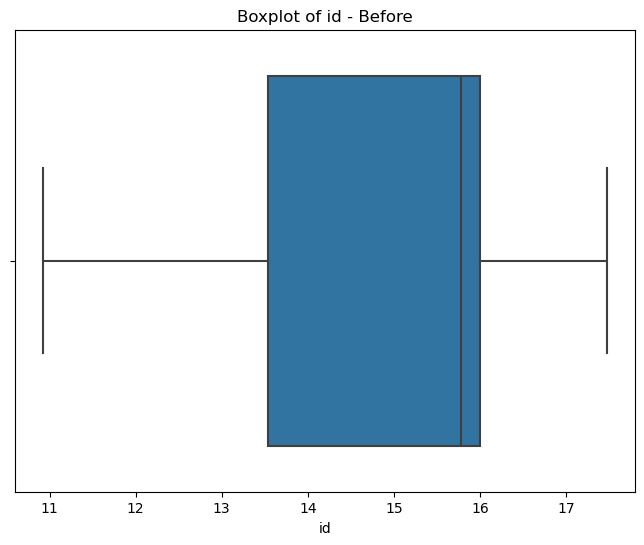

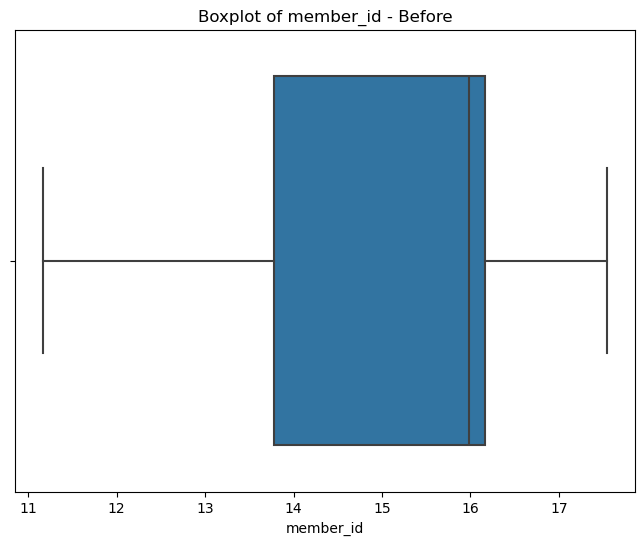

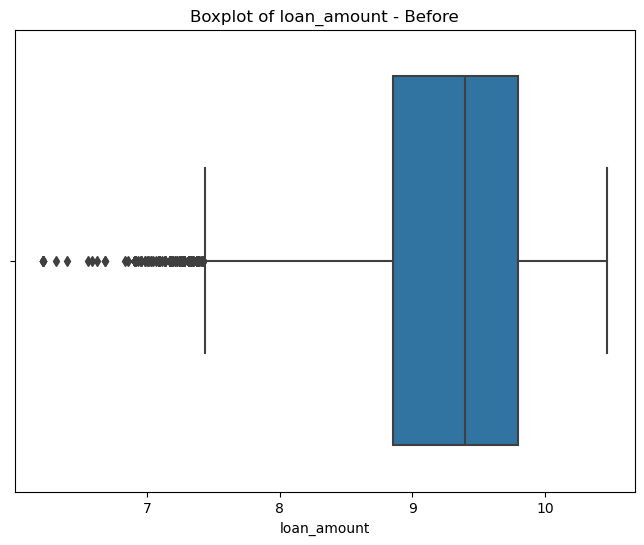

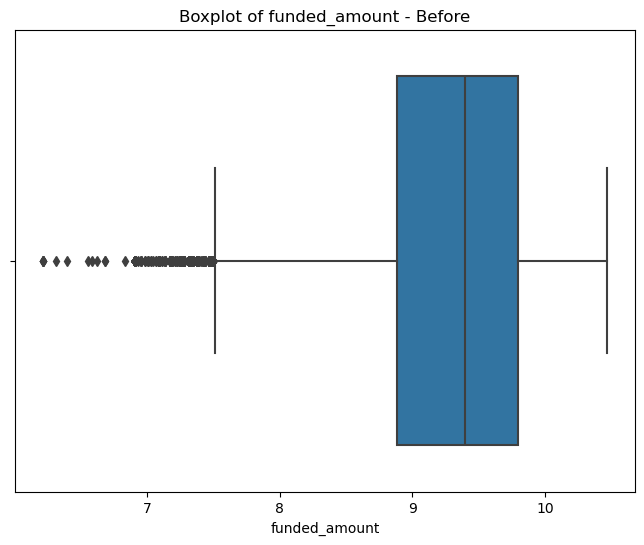

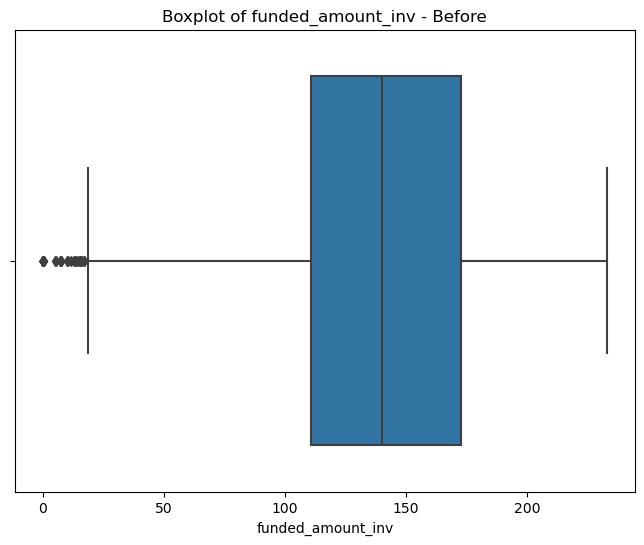

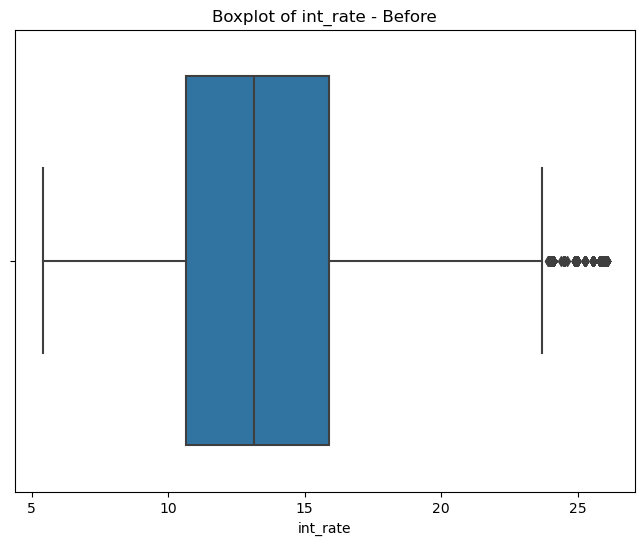

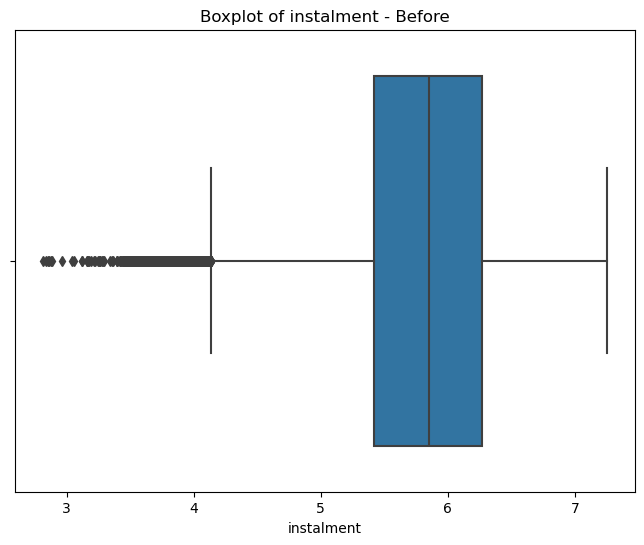

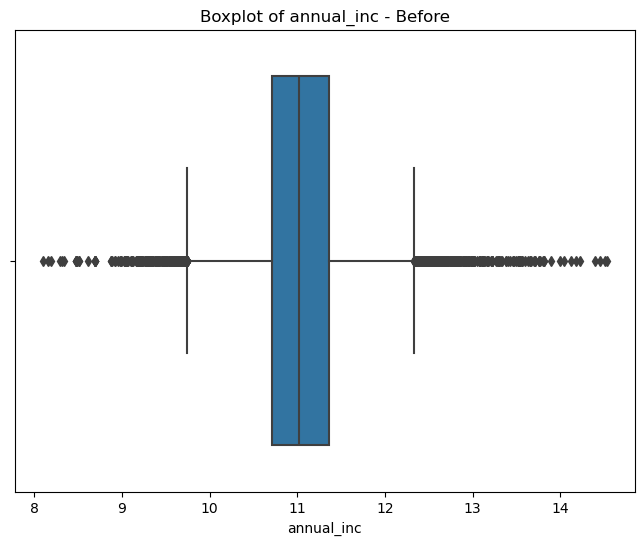

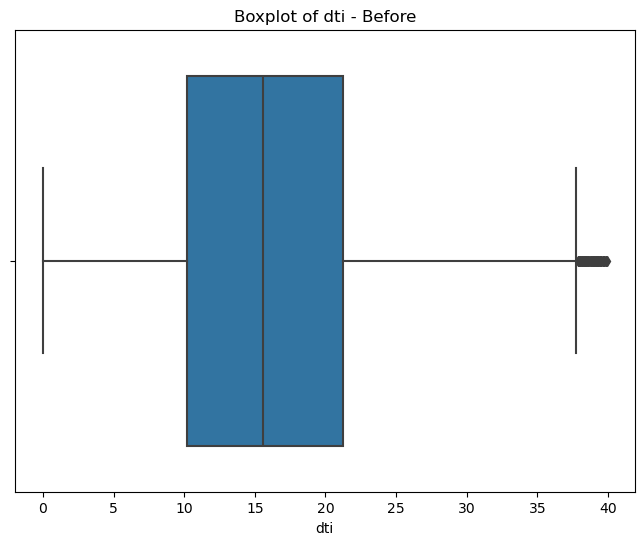

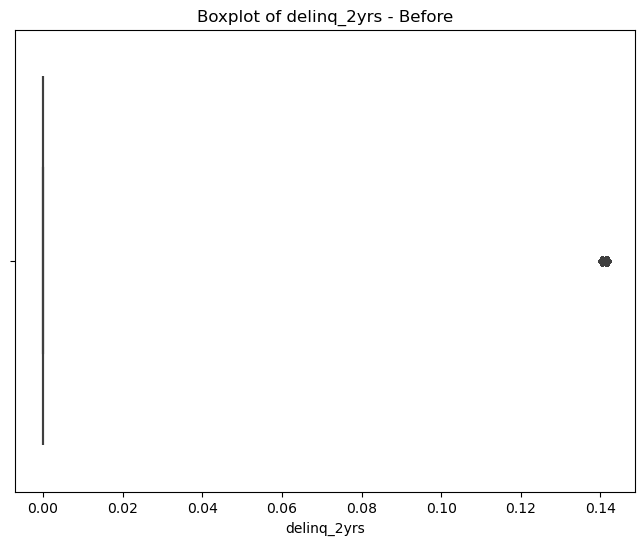

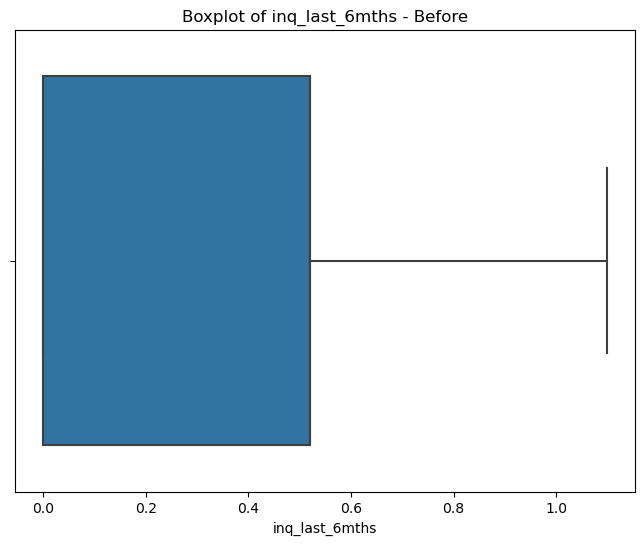

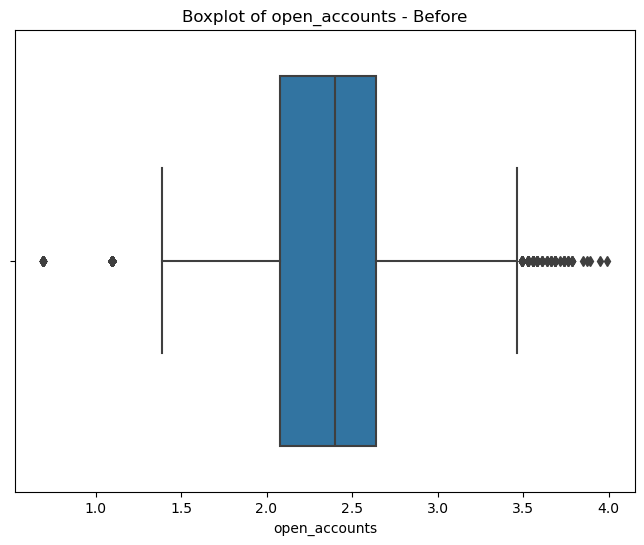

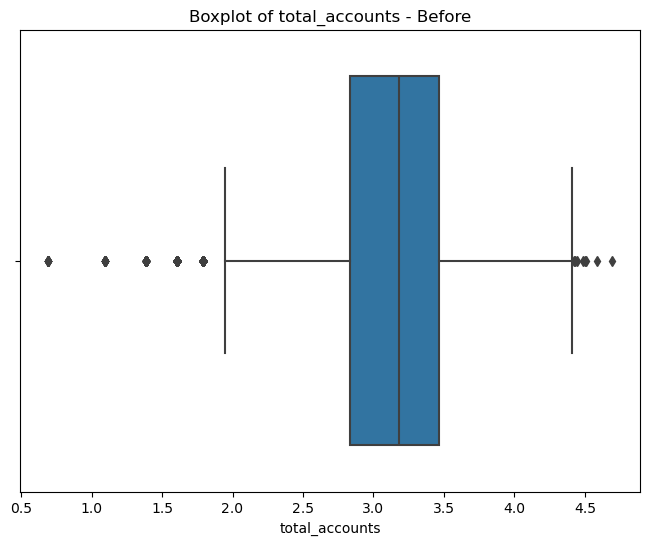

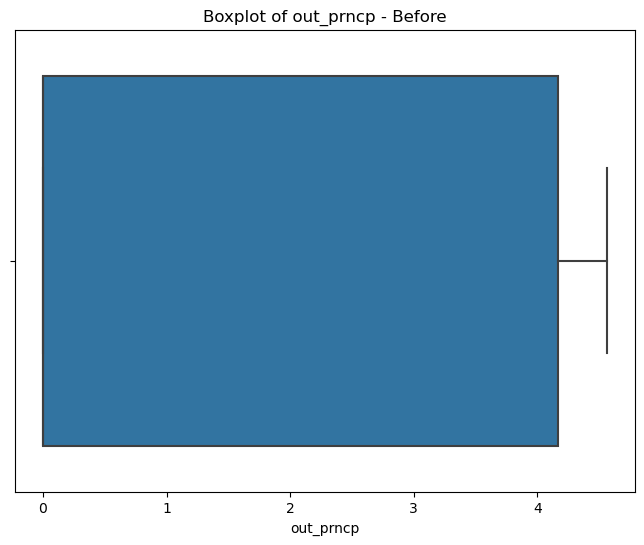

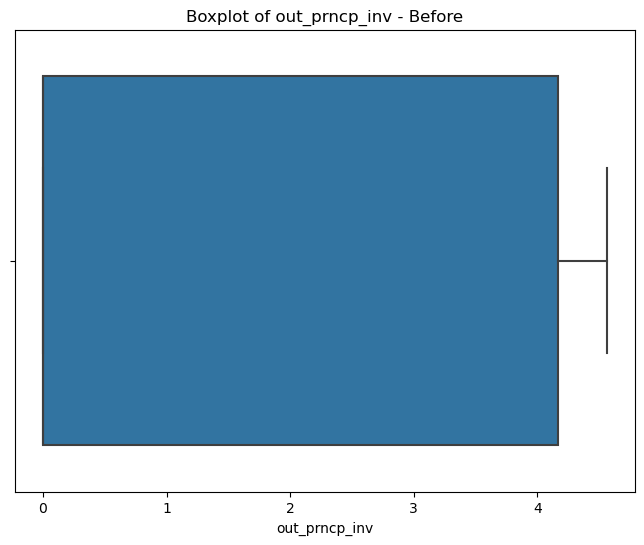

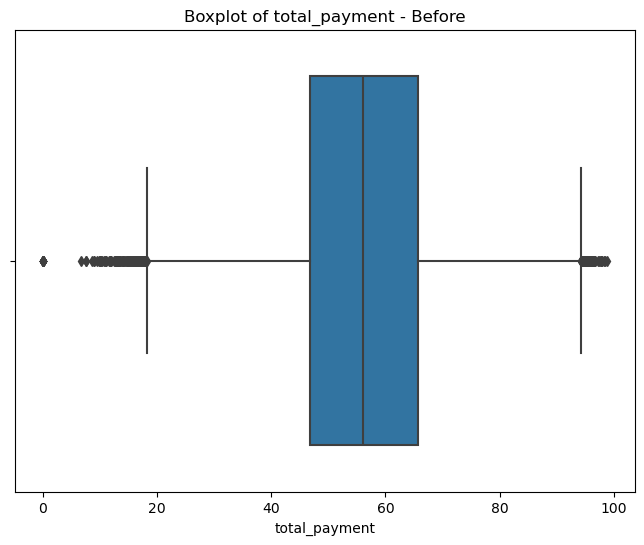

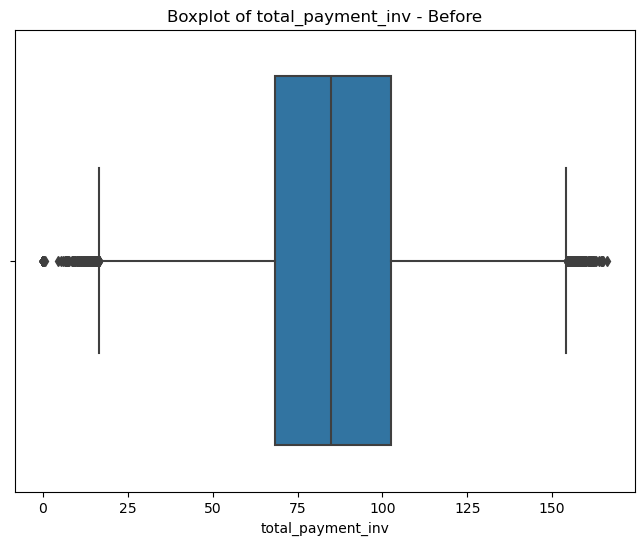

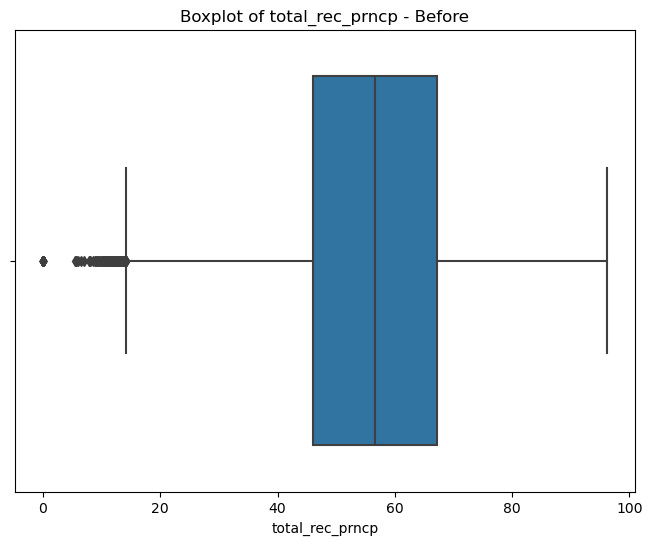

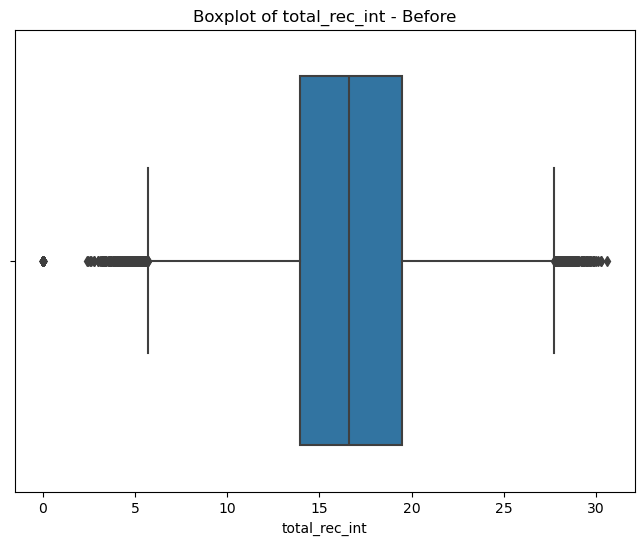

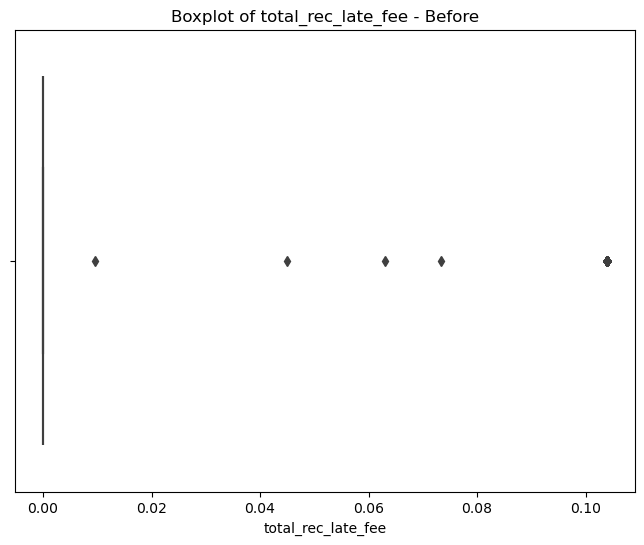

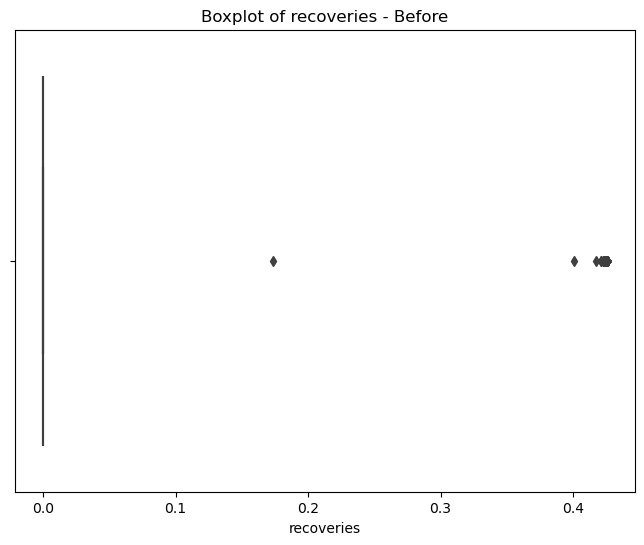

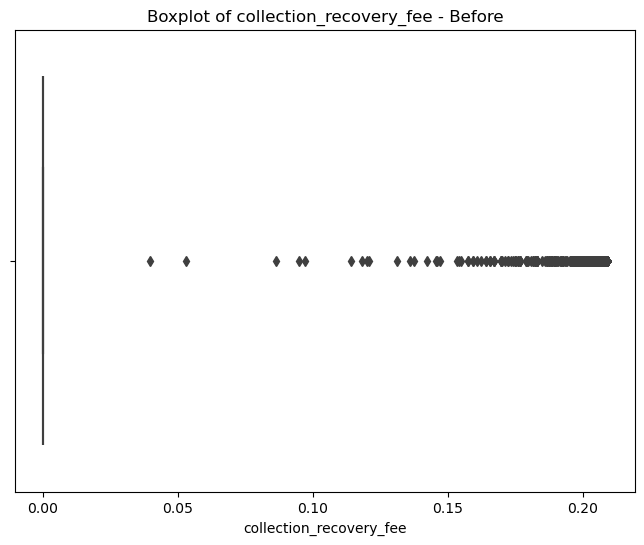

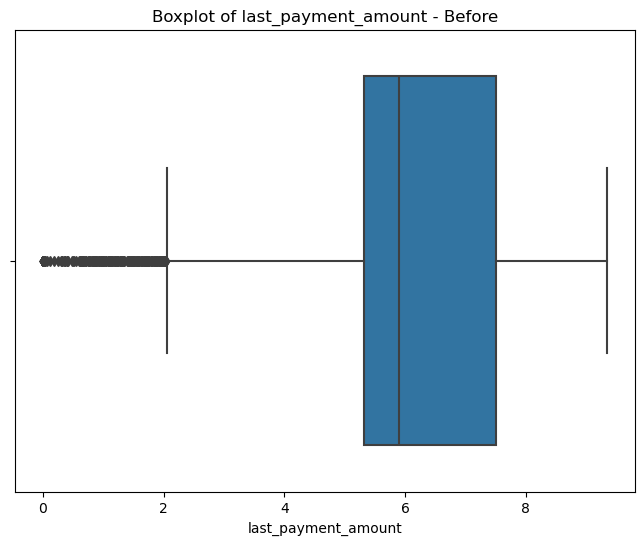

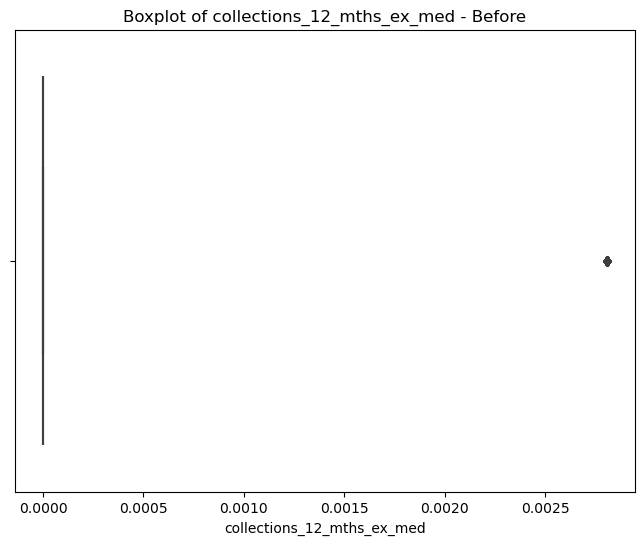

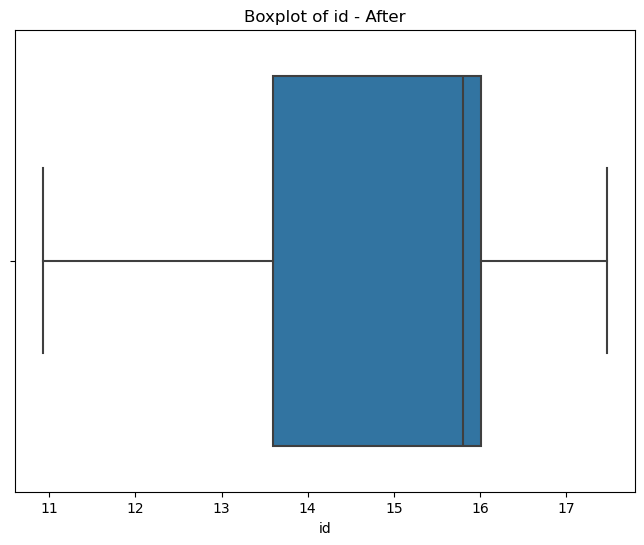

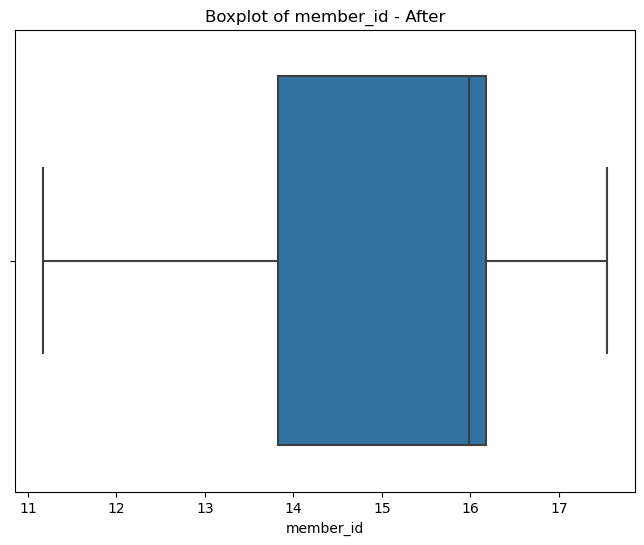

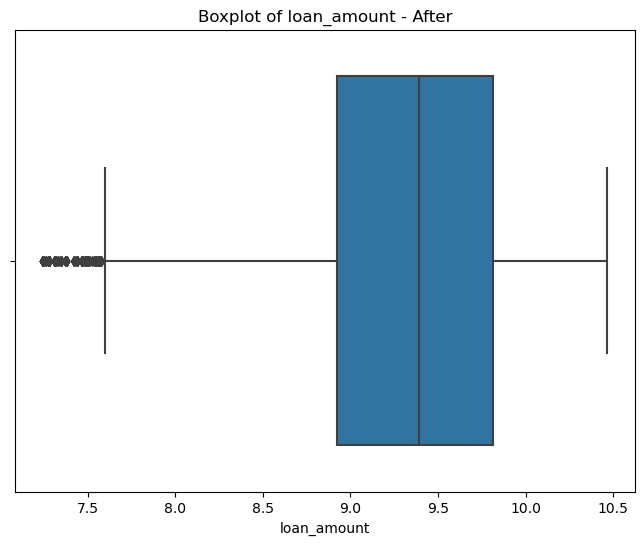

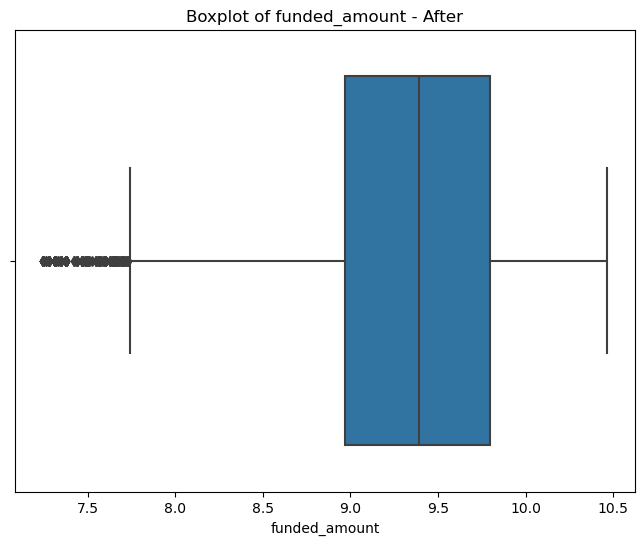

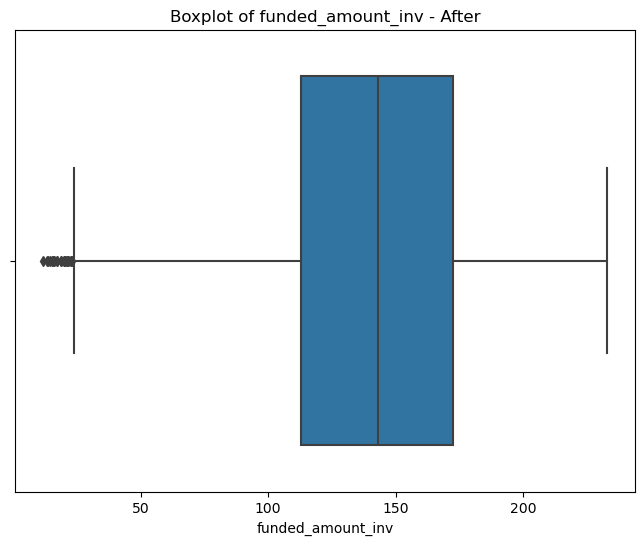

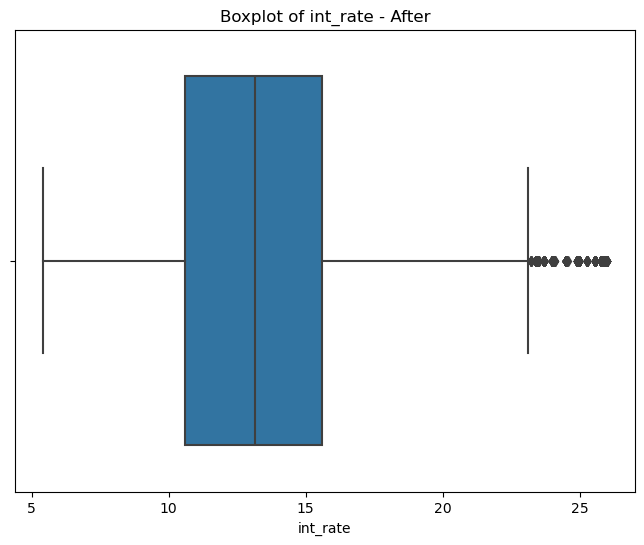

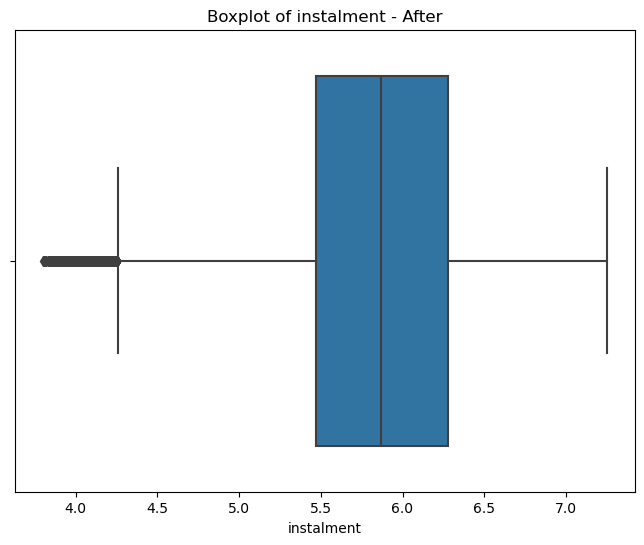

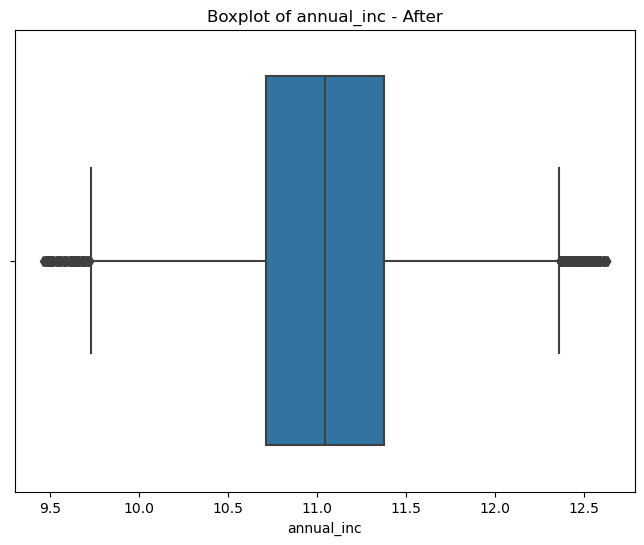

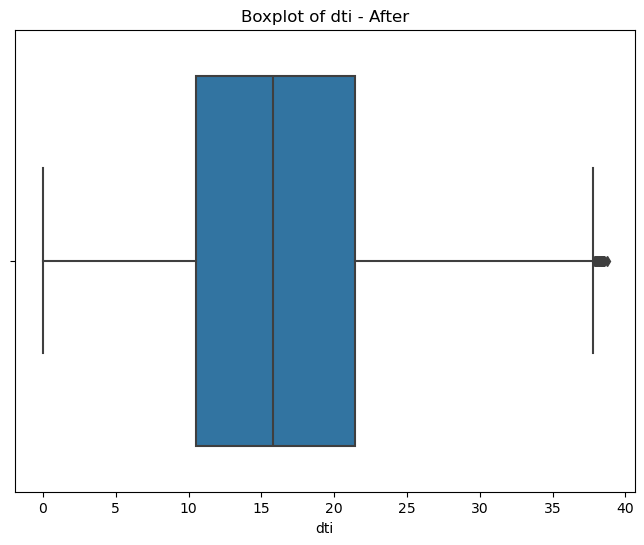

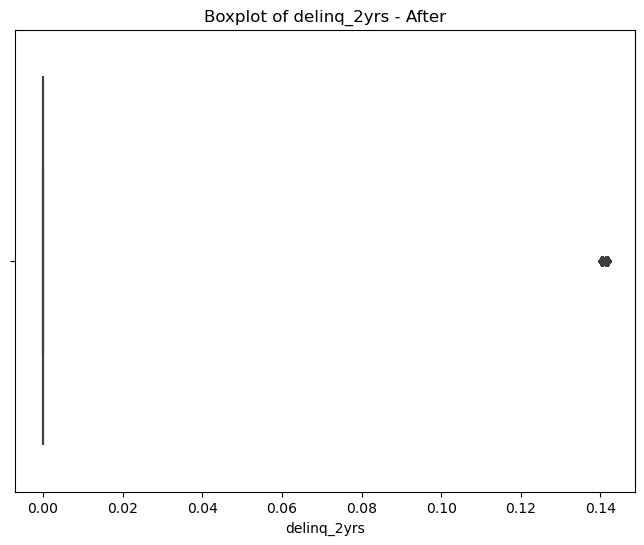

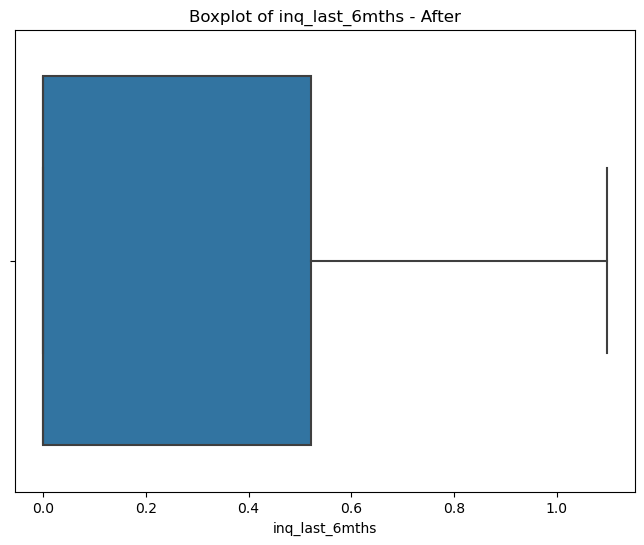

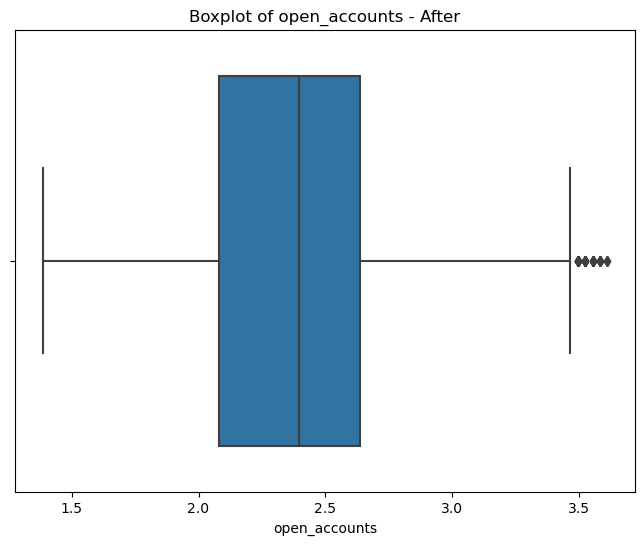

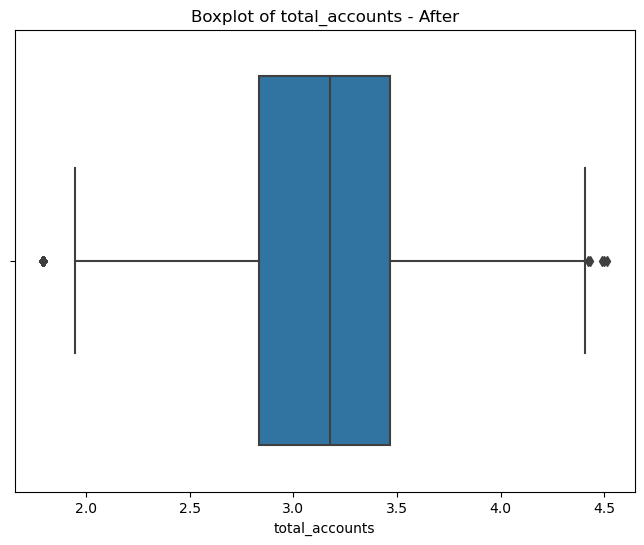

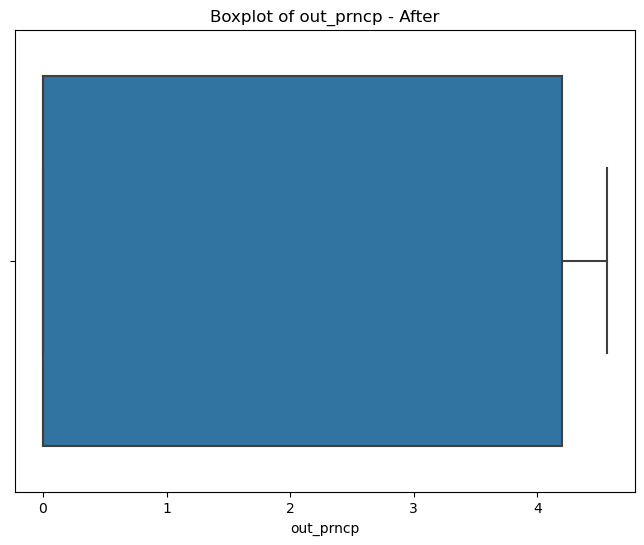

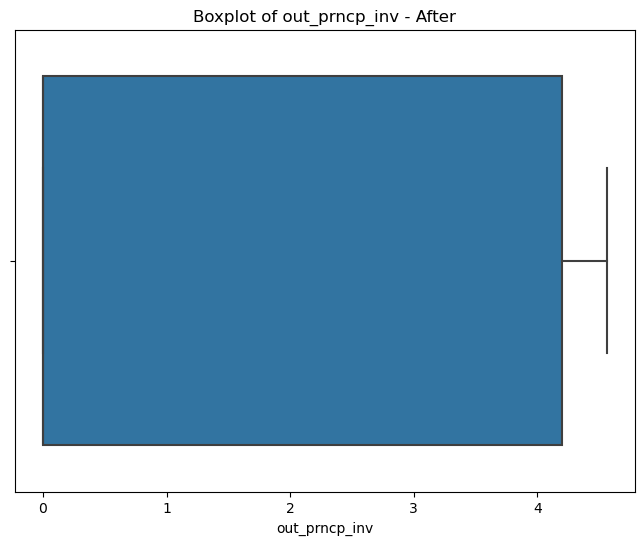

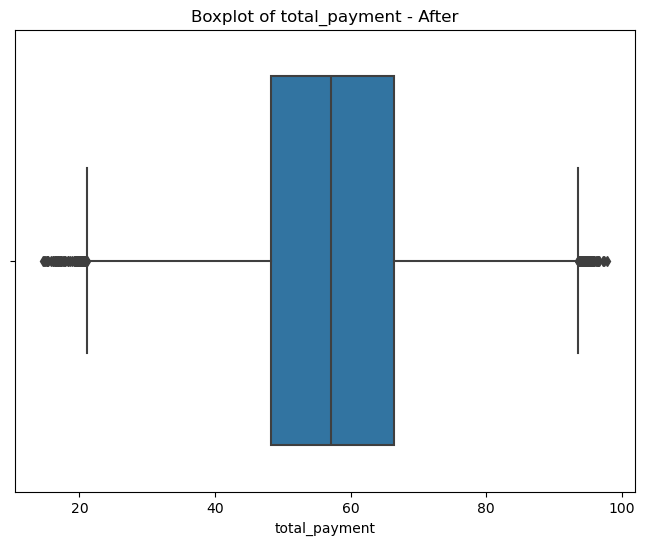

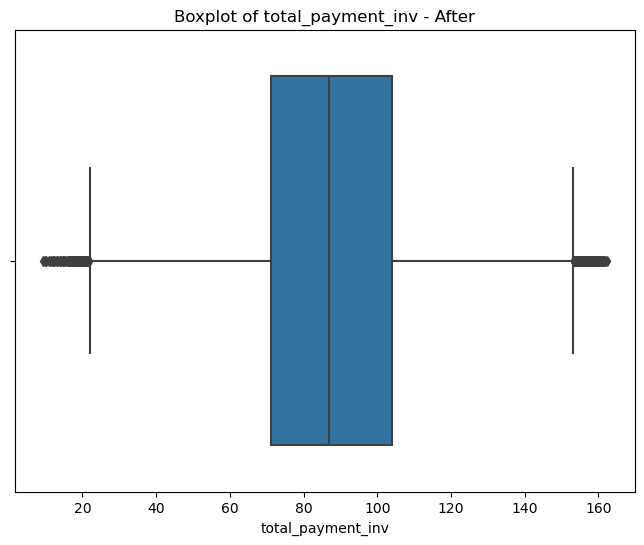

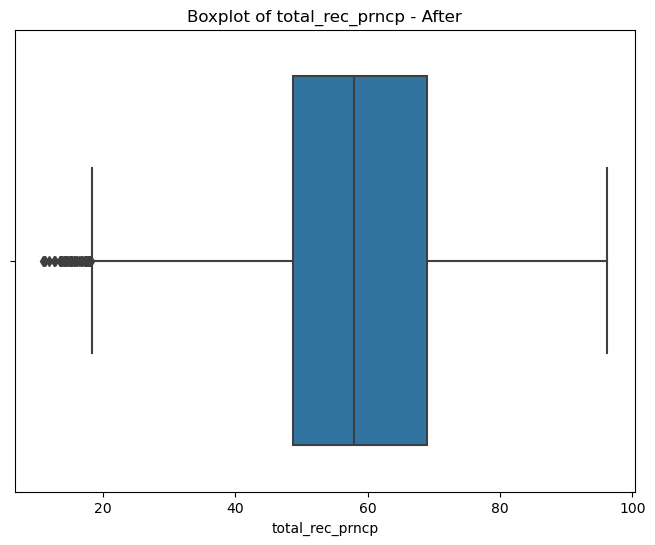

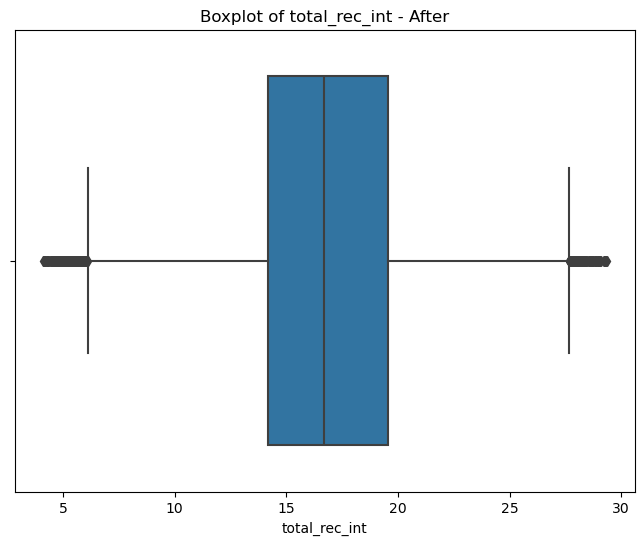

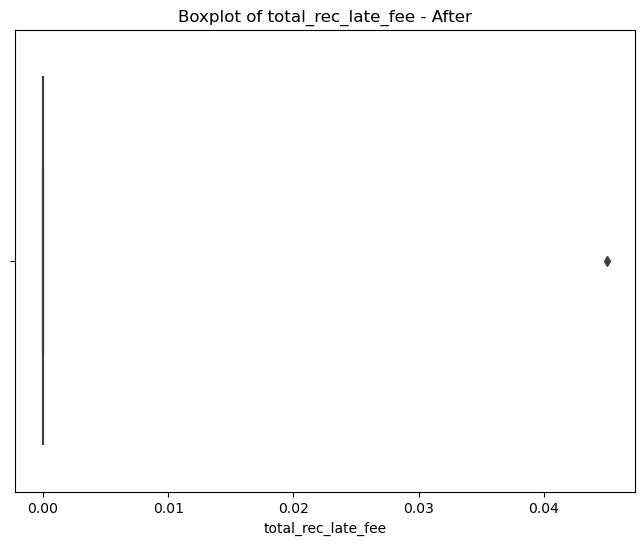

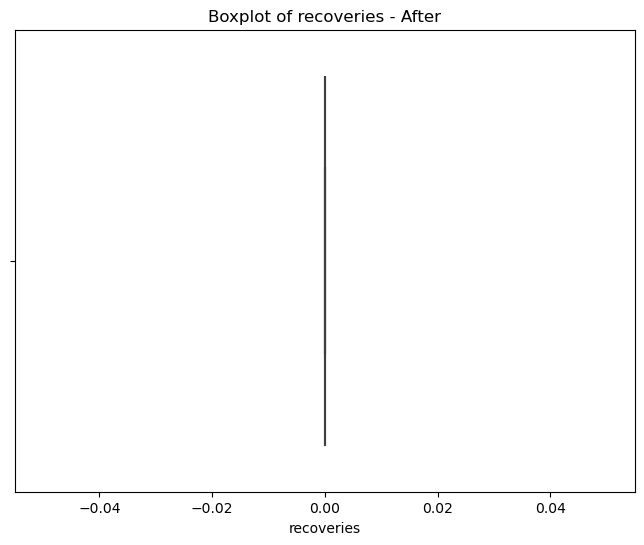

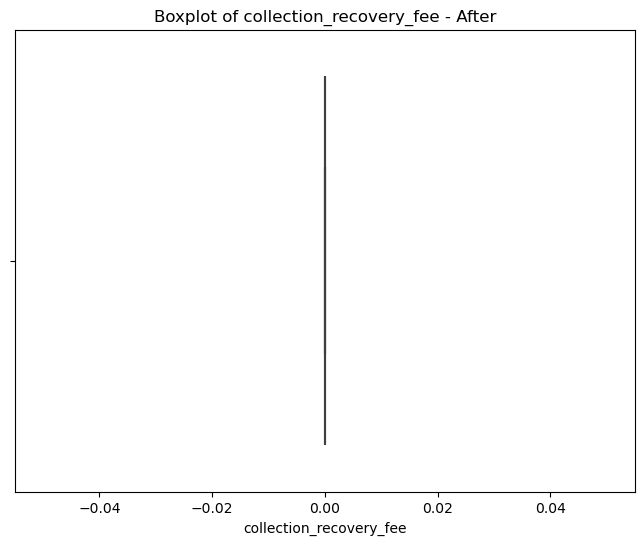

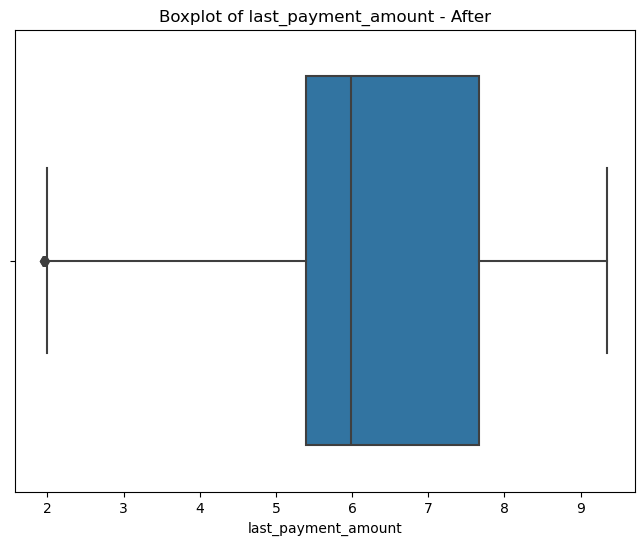

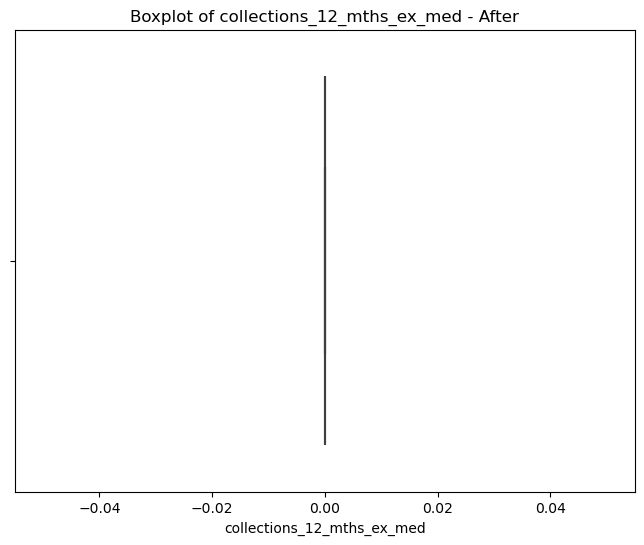

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN

class Plotter:
    @staticmethod
    def plot_boxplots(dataframe, columns, label):
        for col in columns:
            plt.figure(figsize=(8, 6))
            sns.boxplot(x=dataframe[col])
            plt.title(f'Boxplot of {col} - {label}')
            plt.show()

class DataFrameTransform:
    @staticmethod
    def remove_outliers_zscore(dataframe, columns, z_threshold=3):
        z_scores = zscore(dataframe[columns])
        outlier_mask = (abs(z_scores) > z_threshold).any(axis=1)
        dataframe_no_outliers = dataframe[~outlier_mask]
        return dataframe_no_outliers

transformed_data_path = 'C:/Users/admin/EDA - Customer Loans/transformed_data_after_skew.csv'
transformed_data = pd.read_csv(transformed_data_path)

# Create instances of Plotter and DataFrameTransform
plotter = Plotter()
transformer = DataFrameTransform()

# Identify float64 datatype columns
float64_columns = transformed_data.select_dtypes(include='float64').columns

# Visualize outliers before removal
plotter.plot_boxplots(transformed_data, float64_columns, 'Before')

# Remove outliers using Z-Score method
transformed_data_no_outliers_zscore = transformer.remove_outliers_zscore(transformed_data, float64_columns)

# Visualize outliers after removal
plotter.plot_boxplots(transformed_data_no_outliers_zscore, float64_columns, 'After')